## Transformers" in the context of artificial intelligence are a type of computer model designed to understand and generate human language. They're really good at tasks like translating languages, answering questions, and generating text. 

- Transformers rely on a mechanism called "self-attention" to weigh the importance of different words in a sentence when processing language data. This mechanism allows them to capture long-range dependencies and relationships between words more effectively than previous models. As a result, Transformers have achieved state-of-the-art performance in many NLP tasks, including language translation, text summarization, question answering, and sentiment analysis.

- In the context of Gen AI, Transformers represent a foundational technology that enables machines to understand and generate human-like text, facilitating more advanced and natural interactions between AI systems and humans. They are a key component in advancing AI capabilities towards more sophisticated language understanding and generation tasks.
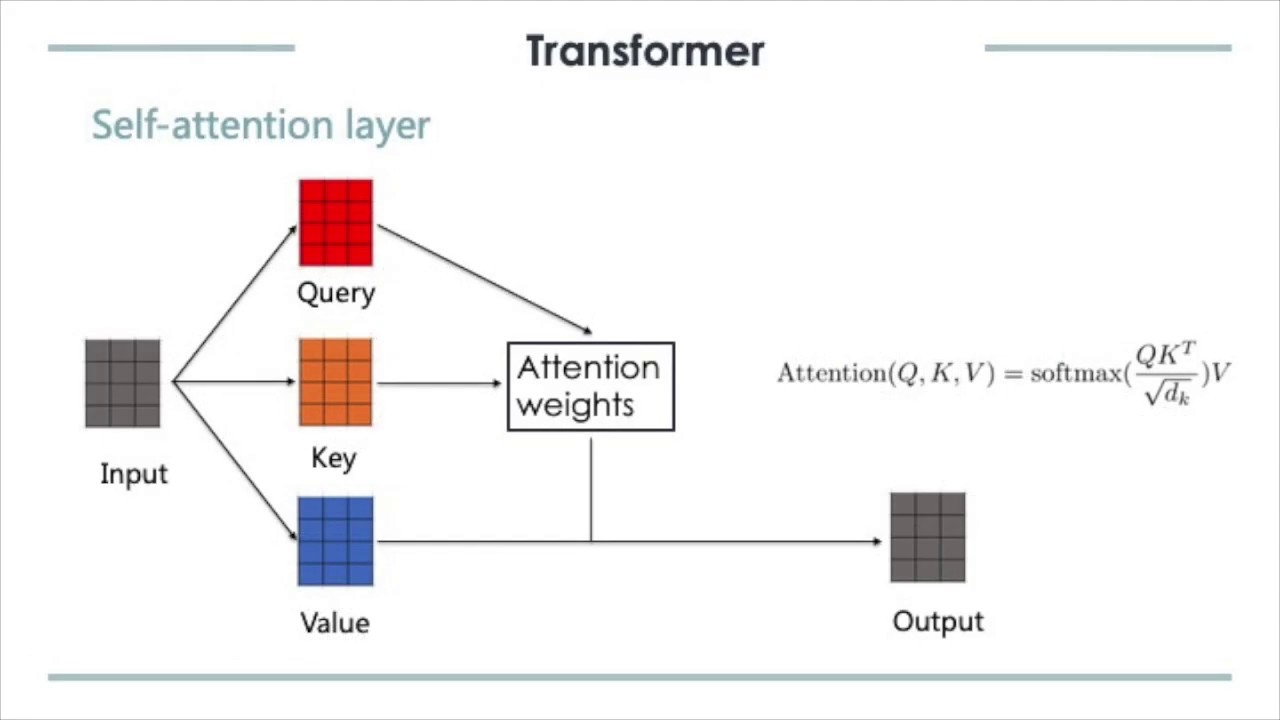

## The key components of Transformer models include:

- 1. **Self-Attention Mechanism**: This is the core component of Transformers. Self-attention allows the model to weigh the importance of different words in a sentence when processing language data. It enables capturing contextual relationships between words in a sequence, facilitating better understanding of the input.

- 2. **Multi-Head Attention**: In Transformers, self-attention is typically used in multiple "heads" or parallel attention mechanisms. Each head allows the model to focus on different parts of the input, enabling it to capture different types of relationships simultaneously.

- 3. **Positional Encoding**: Since Transformer models do not inherently understand the sequential order of input tokens like recurrent neural networks (RNNs), positional encoding is added to the input embeddings to provide information about the position of each token in the sequence.

- 4. **Feedforward Neural Networks**: Transformers include feedforward neural networks as part of their architecture. These networks are applied independently to each token's representation after self-attention and positional encoding, allowing the model to capture non-linear relationships between features.

- 5. **Encoder and Decoder Layers**: Transformer architectures often consist of encoder and decoder layers. The encoder processes the input sequence, while the decoder generates the output sequence in tasks like sequence-to-sequence translation. Each layer in the encoder and decoder typically includes self-attention and feedforward neural network sub-layers.

- 6. **Residual Connections and Layer Normalization**: To facilitate training deep networks, Transformers use residual connections around each sub-layer followed by layer normalization. These techniques help alleviate the vanishing gradient problem and improve the flow of information through the network.

- 7. **Masking**: In tasks like language translation, where the entire input sequence is available during training, masking is applied to prevent the model from attending to future tokens when predicting the output sequence.

These components work together to enable Transformers to achieve state-of-the-art performance in various natural language processing tasks.

In [ ]:
"Life is good"

["Life","is","Good"] - Token of words

[1 0  0 
0  1  0
0  0  1] * Weight Random matrix 




## Word Embedding

- Word embedding is a technique used to represent words as vectors (arrays of numbers). These vectors capture semantic relationships between words.



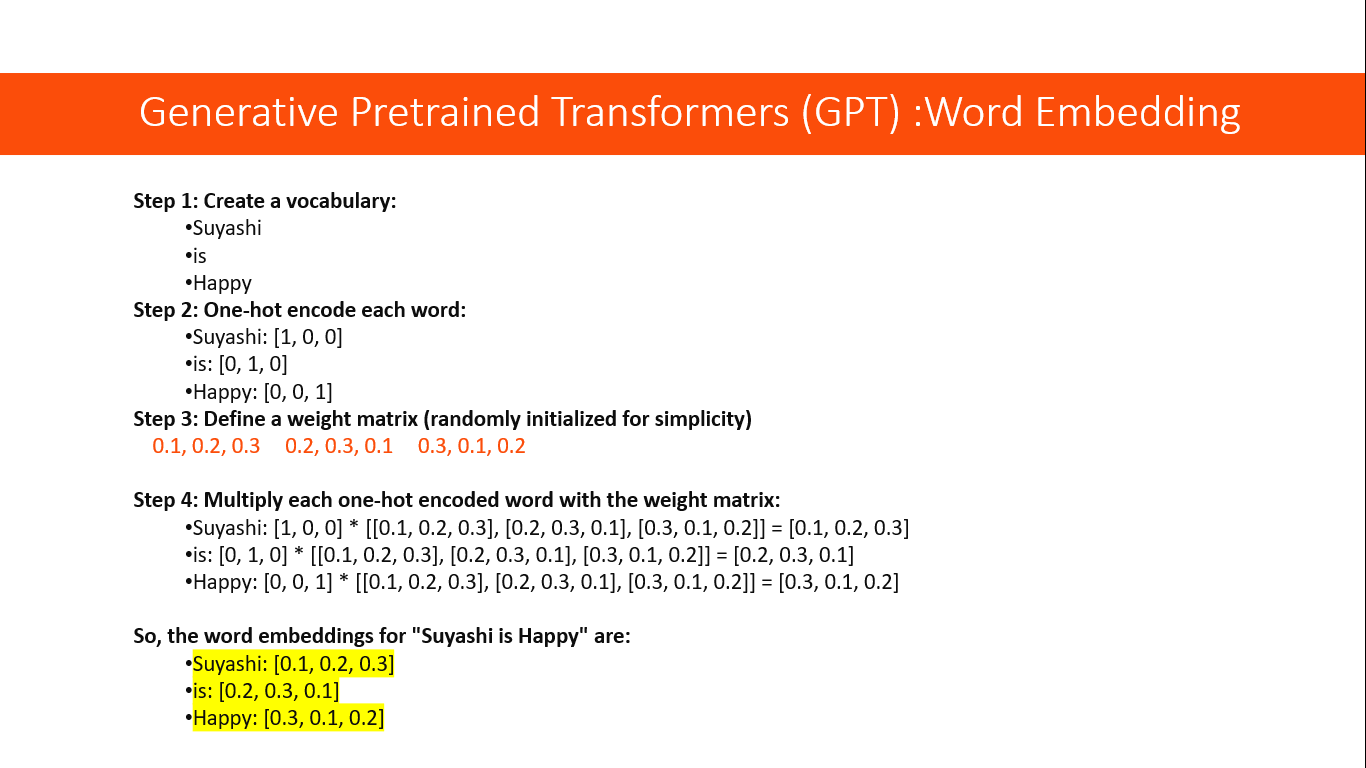

In [2]:
## Word Emdedding using Python 
import numpy as np

# Define the vocabulary
vocab = {"Suyashi": 0, "is": 1, "Happy": 2}

# One-hot encode each word
def one_hot_encoding(word_index, vocab_size):
    one_hot = np.zeros(vocab_size)
    one_hot[word_index] = 1
    return one_hot

# Define the weight matrix (random initialization for simplicity)
weight_matrix = np.random.rand(len(vocab), 3)

# Multiply one-hot encoded words with the weight matrix
word_embeddings = {}
for word, index in vocab.items():
    one_hot_encoded = one_hot_encoding(index, len(vocab))
    embedding = np.dot(one_hot_encoded, weight_matrix)
    word_embeddings[word] = embedding

# Display word embeddings
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")


Suyashi: [0.16120329 0.47682288 0.8795132 ]
is: [0.78818444 0.45683235 0.7835939 ]
Happy: [0.12477206 0.00346698 0.55605209]


## Step 2:

- Backpropagation: We'll use a simple example to demonstrate how backpropagation might update the weights of a neural network based on the error calculated during training.
- Position Encoding: We'll implement a basic position encoding scheme to add positional information to the word embeddings.

In [ ]:
## Back Propagation
import numpy as np

# Forward pass
def forward_pass(inputs, weights):
    return np.dot(inputs, weights)

# Backward pass
def backward_pass(inputs, weights, error):
    # Update weights based on the error
    gradient = np.dot(inputs.T, error)
    weights -= gradient * learning_rate

# Define inputs and initial weights
inputs = np.array([[0.1, 0.2, 0.3]])
initial_weights = np.random.rand(3, 3)

# Perform forward pass
output = forward_pass(inputs, initial_weights)

# Assume the target output is known (e.g., for supervised learning)
target_output = np.array([[1.0, 0.9, 0.8]])

# Calculate error
error = output - target_output

# Backpropagation to update weights
learning_rate = 0.01 ##(0.001 to 0.01)range of learning rate
backward_pass(inputs, initial_weights, error)

# Display updated weights
print("Updated weights after backpropagation:")
print(initial_weights)


## let's implement a basic position encoding scheme to add positional information to the word embeddings:

sin o =0 

Tomorrow = 1
is=0
wed=0
Tomorrow [1.0.0]
is=1      [0.1.0]
wed=0  
is 


In [3]:
import numpy as np

# Position Encoding
def position_encoding(sentence_length, embedding_dim):
    position_encodings = np.zeros((sentence_length, embedding_dim))
    for pos in range(sentence_length):
        for i in range(embedding_dim):
            if i % 2 == 0:
                position_encodings[pos, i] = np.sin(pos / (10000 ** (i / embedding_dim)))
            else:
                position_encodings[pos, i] = np.cos(pos / (10000 ** ((i - 1) / embedding_dim)))
    return position_encodings

# Assuming we have word embeddings for "Suyashi", "is", "Happy" as follows
word_embeddings = {
    "Suyashi": np.array([0.1, 0.2, 0.3]),
    "is": np.array([0.2, 0.3, 0.1]),
    "Happy": np.array([0.3, 0.1, 0.2])
}

# Get the position encodings
sentence_length = 3
embedding_dim = 3
pos_encodings = position_encoding(sentence_length, embedding_dim)

# Add position encodings to word embeddings
for i, word in enumerate(word_embeddings):
    word_embeddings[word] += pos_encodings[i % sentence_length]

# Display word embeddings with position encodings
print("Word embeddings with position encodings:")
for word, embedding in word_embeddings.items():
    print(f"{word}: {embedding}")


Word embeddings with position encodings:
Suyashi: [0.1 1.2 0.3]
is: [1.04147098 0.84030231 0.10215443]
Happy: [ 1.20929743 -0.31614684  0.20430886]


In [ ]:
B = np.ones((3,3))
B

In [ ]:
A

- We define the position encoding function and word embeddings as we did previously.
- We concatenate word embeddings with position encodings to create input vectors.
- The self_attention function calculates attention scores using dot product and scales them by the square root of the dimensionality of the embeddings.
- Softmax is applied to obtain attention weights.
- The attention weights are then used to compute the attended inputs by applying them to the input vectors.
- Finally, we display the attended inputs and attention weights.

In [4]:
import numpy as np

# Position Encoding
def position_encoding(sentence_length, embedding_dim):
    position_encodings = np.zeros((sentence_length, embedding_dim))
    for pos in range(sentence_length):
        for i in range(embedding_dim):
            if i % 2 == 0:
                position_encodings[pos, i] = np.sin(pos / (10000 ** (i / embedding_dim)))
            else:
                position_encodings[pos, i] = np.cos(pos / (10000 ** ((i - 1) / embedding_dim)))
    return position_encodings

# Word embeddings for "Suyashi", "is", "Happy"
word_embeddings = {
    "Suyashi": np.array([0.1, 0.2, 0.3]),
    "is": np.array([0.2, 0.3, 0.1]),
    "Happy": np.array([0.3, 0.1, 0.2])
}

# Get the position encodings
sentence_length = 3
embedding_dim = 3
pos_encodings = position_encoding(sentence_length, embedding_dim)

# Concatenate word embeddings with position encodings
inputs = np.array([word_embeddings[word] + pos_encodings[i] for i, word in enumerate(word_embeddings)])

# Self-attention mechanism
def self_attention(inputs):
    # Calculate attention scores
    attention_scores = np.dot(inputs, inputs.T) / np.sqrt(inputs.shape[-1])
    
    # Apply softmax to obtain attention weights
    attention_weights = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=-1, keepdims=True)
    
    # Apply attention weights to inputs
    attended_inputs = np.dot(attention_weights, inputs)
    
    return attended_inputs, attention_weights

# Apply self-attention
attended_inputs, attention_weights = self_attention(inputs)

# Display results
print("Attended Inputs:")
print(attended_inputs)
print("\nAttention Weights:")
print(attention_weights)



Attended Inputs:
[[0.63448685 0.81047639 0.21099442]
 [0.80976342 0.62970605 0.18847823]
 [0.96158921 0.34185482 0.18548879]]

Attention Weights:
[[0.46252785 0.36781824 0.16965391]
 [0.29492673 0.4312344  0.27383886]
 [0.17117121 0.34457284 0.48425595]]


## Simplified implementation using NumPy to demonstrate self-attention
steps:
- X represents the input token embeddings.
- W_q, W_k, and W_v represent the query, key, and value projection matrices respectively.
- We compute the dot products of query and key matrices to get the attention scores.
- Softmax is applied to the attention scores to get the attention weights.
- Finally, we compute the weighted sum of value vectors to get the output.

In [ ]:
import numpy as np

# Define input tokens (embedding vectors)
X = np.array([
    [0.1, 0.2, 0.3],  # Embedding vector for "Ashi"
    [0.4, 0.5, 0.6],  # Embedding vector for "is"
    [0.7, 0.8, 0.9],  # Embedding vector for "beautiful"
])

In [ ]:

# Define query, key, and value matrices (linear projections)
W_q = np.random.rand(3, 3)  # Random query matrix
W_k = np.random.rand(3, 3)  # Random key matrix
W_v = np.random.rand(3, 3)  # Random value matrix

W_k

In [ ]:
# Compute dot products of query and key matrices
Q = np.dot(X, W_q.T)  # Query vectors
K = np.dot(X, W_k.T)  # Key vectors
Q, K

In [ ]:

# Compute attention scores
attention_scores = np.dot(Q, K.T) / np.sqrt(3)  # Divided by sqrt(d_k)

# Apply softmax to get attention weights
attention_weights = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=1, keepdims=True)

# Compute weighted sum of value vectors to get output
V = np.dot(X, W_v.T)  # Value vectors
output = np.dot(attention_weights, V)

print("Attention Weights:")
print(attention_weights)
print("\nOutput:")
print(output)


## Simplified Python code demonstrating how self-attention might be applied in a neural machine translation scenario using the transformers library
- This code uses the BERT model from the transformers library to tokenize the input text, compute its hidden states, and extract the self-attention weights. These weights indicate how much each token attends to every other token in each layer of the model. However, note that BERT is not specifically trained for machine translation, so this is just an illustration of self-attention in a language model context.

## Steps



1. Tokenization: The input text "Ashi is beautiful." is tokenized into its constituent tokens using the BERT tokenizer. Each token is represented by an integer ID. Let's denote the tokenized input as 
𝑋
X.
2. Model Computation: The tokenized input 
𝑋
3. X is fed into the BERT model, which consists of multiple layers of self-attention and feedforward neural networks. The BERT model processes the input tokens and produces hidden states for each token. Let's denote the hidden states as 
𝐻
4. Self-Attention: During each layer of the BERT model, self-attention is applied to the input tokens. The self-attention mechanism computes attention scores between each token and every other token in the sequence. These attention scores are calculated using the formula:

5. Self-Attention Weights: The self-attention weights represent the importance of each token attending to every other token in the sequence. These weights are computed for each layer of the model. In the code, the mean of the attention weights across the sequence dimension is calculated for each layer and printed out.

In [5]:
import torch
from transformers import BertModel, BertTokenizer, BertConfig

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Input text
input_text = "Ashi is beautiful."

# Tokenize input text
input_ids = tokenizer.encode(input_text, add_special_tokens=True, return_tensors="pt")

# Get BERT model's output
outputs = model(input_ids)

# Check if the model supports attention weights
config = BertConfig.from_pretrained(model_name)
if config.output_attentions:
    # Extract hidden states
    hidden_states = outputs.last_hidden_state

    # Self-attention
    self_attention_weights = outputs.attentions

    # Print self-attention weights
    print("Self-attention weights:")
    for layer, attn_weights in enumerate(self_attention_weights):
        print(f"Layer {layer+1}: {attn_weights.mean(dim=1)}")

# Decoding input text
decoded_output = tokenizer.decode(input_ids[0], skip_special_tokens=True)
print("Decoded output from positional encoder:", decoded_output)

# Get the model's final output
final_output = outputs[0]

# Print the final output
print("Final output:", final_output)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Suyashi144893\.cache\huggingface\hub\models--bert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Decoded output from positional encoder: Ashi is beautiful.
Final output: tensor([[[-1.3180e-01,  3.0580e-01,  4.7159e-01,  ...,  1.5933e-01,
          -2.4468e-01,  1.0558e-01],
         [-7.7932e-01, -6.8627e-02,  1.1448e+00,  ...,  2.0893e-01,
           4.1032e-01, -2.7293e-01],
         [-1.7906e-01,  6.4059e-02,  1.2786e+00,  ..., -3.1068e-01,
           1.0254e-01, -2.6945e-01],
         ...,
         [ 8.9864e-04,  4.3957e-01,  5.1864e-01,  ...,  5.6646e-01,
          -5.9460e-01, -3.7841e-02],
         [ 5.6527e-02,  3.6165e-01,  7.9546e-01,  ...,  2.0986e-01,
          -7.0415e-01, -8.5387e-02],
         [-2.2144e-01,  1.5282e-01,  1.0640e+00,  ...,  1.2131e-01,
          -2.6769e-01, -2.4737e-01]]], grad_fn=<NativeLayerNormBackward0>)


## Example Language Translation

Hindi → Helsinki-NLP/opus-mt-en-hi

Spanish → Helsinki-NLP/opus-mt-en-es

French → Helsinki-NLP/opus-mt-en-fr

German → Helsinki-NLP/opus-mt-en-de

Italian → Helsinki-NLP/opus-mt-en-it

Portuguese → Helsinki-NLP/opus-mt-en-pt

Chinese (Mandarin) → Helsinki-NLP/opus-mt-en-zh

Japanese → Helsinki-NLP/opus-mt-en-ja

Russian → Helsinki-NLP/opus-mt-en-ru

Arabic → Helsinki-NLP/opus-mt-en-ar

In [1]:
import torch
from transformers import MarianMTModel, MarianTokenizer

# Load pre-trained MarianMT model and tokenizer for English to Hindi translation
model_name = 'Helsinki-NLP/opus-mt-en-hi'
tokenizer = MarianTokenizer.from_pretrained(model_name)
eng_hindi = MarianMTModel.from_pretrained(model_name)

# Input text
input_text = input("Enter sentence you want to translalte:")

# Tokenize input text
input_ids = tokenizer(input_text, return_tensors="pt")

# Perform translation
translated_output = eng_hindi .generate(**input_ids)

# Decode the translated output
translated_text = tokenizer.decode(translated_output[0], skip_special_tokens=True)

# Print the translated output
print("Translated Output (Hindi):")
print(translated_text)

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Enter sentence you want to translalte:I love travelling
Translated Output (Hindi):
मुझे यात्रा करना पसंद है


In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# Load the pre-trained translation model and tokenizer for English to German
model_name = "Helsinki-NLP/opus-mt-en-de"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Input text in English
input_text = input("Enter the Text: ")

# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt")

# Perform translation
outputs = model.generate(**inputs)

# Decode the translated text
decoded_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the decoded text
print("Decoded text in German:", decoded_text)


pip install wordcloud --trusted-host pypi.org --trusted-host files.pythonhosted.org pip install pipeline

In [ ]:
pip install wordcloud --trusted-host pypi.org --trusted-host files.pythonhosted.org pip install sacremoses / Transformers/SentencePiece

import sys
print("Python version:", sys.version)



In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)
model.eval()

# Define labels
labels = ['Negative', 'Positive']

# Function to perform text classification
def classify_text(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    # Classify text using BERT model
    with torch.no_grad():
        outputs = model(**inputs)
    # Get predicted probabilities
    probabilities = torch.softmax(outputs.logits, dim=1).squeeze().numpy()
    # Get predicted label index
    predicted_label_index = np.argmax(probabilities)
    # Get predicted label
    predicted_label = labels[predicted_label_index]
    return predicted_label, probabilities

# User input for text
user_text = input("Enter the text you want to classify: ")

# Perform text classification
predicted_label, probabilities = classify_text(user_text)

# Print results
print("Predicted label:", predicted_label)
print("Probabilities:", probabilities)

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForMaskedLM

def roberta_synonyms(word, top_k=5):
    # Load pre-trained model and tokenizer
    model_name = 'roberta-base'
    tokenizer = RobertaTokenizer.from_pretrained(model_name)
    model = RobertaForMaskedLM.from_pretrained(model_name)
    
    # Encode the word within a sentence
    text = f"I am very {word} today."
    tokenized_text = tokenizer.tokenize(text)
    
    # Replace the word with a mask token
    masked_index = tokenized_text.index(word)
    tokenized_text[masked_index] = tokenizer.mask_token
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    
    # Convert to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    
    # Predict all tokens
    with torch.no_grad():
        outputs = model(tokens_tensor)
        predictions = outputs.logits
    
    # Get the predicted words for the masked token
    predicted_index = torch.topk(predictions[0, masked_index], top_k).indices
    predicted_tokens = tokenizer.convert_ids_to_tokens(predicted_index)
    
    # Filter out the original word
    predicted_tokens = [token for token in predicted_tokens if token != word]
    
    return predicted_tokens

# Example usage
input_word = input("Enter the word:")
roberta_based_synonyms = roberta_synonyms(input_word, top_k=5)

print(f"RoBERTa-based synonyms for '{input_word}': {roberta_based_synonyms}")
